In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('AusApparalSales4thQrt2020.csv')

# Display original column names
print("Original column names:")
print(data.columns)

# Step 1. Clean column names by removing spaces because the 'Income' column name contains space. This will make it easier to work with the data. 
data.columns = data.columns.str.replace(' ', '')

# Display cleaned column names
print("Cleaned column names:")
print(data.columns)

# Save the cleaned DataFrame back to a CSV file (optional)
data.to_csv('AusApparalSales4thQrt2020_cleaned.csv', index=False)


# Step 2: Missing value imputation for Income
# Clean Education and Marital_Status categories
data['Education'] = data['Education'].str.strip().replace({'2n Cycle': 'Master', 'Basic': 'Undergraduate'})
data['Marital_Status'] = data['Marital_Status'].str.strip().replace({'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'})

# Impute missing Income values
data['Income'] = data.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.median()))

# Step 3: Create variables for total number of children, age, and total spending
data['Total_Children'] = data['Kidhome'] + data['Teenhome']
data['Age'] = 202 - data['Year_Birth']
data['Total_Spending'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Derive total purchases from the number of transactions across the three channels
data['Total_Purchases'] = data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Step 4: Generate box plots and histograms
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Spending', data=data)
plt.title('Box plot of Total Spending')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Total_Spending'], bins=30, kde=True)
plt.title('Histogram of Total Spending')
plt.show()

# Step 5: Apply ordinal and one-hot encoding
data = pd.get_dummies(data, columns=['Education', 'Marital_Status', 'Country'], drop_first=True)

# Step 6: Generate a heatmap to illustrate the correlation between different pairs of variables
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 7: Hypothesis testing
# a. Older individuals may prefer in-store shopping
older_customers = data[data['Age'] > data['Age'].median()]
younger_customers = data[data['Age'] <= data['Age'].median()]
print('Older customers in-store purchases:', older_customers['NumStorePurchases'].mean())
print('Younger customers in-store purchases:', younger_customers['NumStorePurchases'].mean())

# b. Customers with children may prefer online shopping
customers_with_children = data[data['Total_Children'] > 0]
customers_without_children = data[data['Total_Children'] == 0]
print('Customers with children online purchases:', customers_with_children['NumWebPurchases'].mean())
print('Customers without children online purchases:', customers_without_children['NumWebPurchases'].mean())

# c. Cannibalization of physical store sales by other channels
print('Correlation between store purchases and other channels:', data[['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']].corr())

# d. US vs rest of the world in total purchase volumes
us_customers = data[data['Country_US'] == 1]
non_us_customers = data[data['Country_US'] == 0]
print('US customers total purchases:', us_customers['Total_Purchases'].mean())
print('Non-US customers total purchases:', non_us_customers['Total_Purchases'].mean())

# Step 8: Visualization analysis
# a. Top-performing products and lowest revenue products
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_revenue = data[product_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=product_revenue.index, y=product_revenue.values)
plt.title('Product Revenue')
plt.show()

# b. Correlation between age and acceptance rate of the last campaign
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Response', data=data)
plt.title('Age vs Acceptance Rate of Last Campaign')
plt.show()

# c. Country with the highest number of customers who accepted the last campaign
accepted_campaign = data[data['Response'] == 1]
country_acceptance = accepted_campaign['Country'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=country_acceptance.index, y=country_acceptance.values)
plt.title('Country with Highest Number of Customers Who Accepted Last Campaign')
plt.show()

# d. Pattern in the number of children at home and total expenditure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Children', y='Total_Spending', data=data)
plt.title('Number of Children at Home vs Total Expenditure')
plt.show()

# e. Educational background of customers who lodged complaints in the last two years
complaints = data[data['Complain'] == 1]
education_complaints = complaints['Education'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=education_complaints.index, y=education_complaints.values)
plt.title('Educational Background of Customers Who Lodged Complaints')
plt.show()

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

 1. Import data, Clean up column name and examine variables: Dt_Customer and Income

In [15]:
# Load the dataset
data = pd.read_csv('marketing_data.csv')

# Display original column names
print("Original column names:")
print(data.columns)

# Step 1. Clean up
# a. column names by removing spaces because the 'Income' column name contains space. This will make it easier to work with the data. 
data.columns = data.columns.str.replace(' ', '')

# Display cleaned column names
print("Cleaned column names:")
print(data.columns)

print(data.head())
# Save the cleaned DataFrame back to a CSV file (optional)
# data.to_csv('marketing_data.csv', index=False)

# b. data by removing non-numeric characters from the 'Income' columns and converting them to numeric.
# Clean the 'Income' column by removing non-numeric characters and converting to numeric
data['Income'] = data['Income'].str.replace(r'[\$,]', '', regex=True).str.strip().astype(float)
# data['Income'] = pd.to_numeric(data['Income'])

# c. data by converting the 'Dt_Customer' column to a datetime format.
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

print(data.head())
data.isnull().sum()

Original column names:
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')
Cleaned column names:
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response

/var/folders/9l/kd0gvnp51998_xw_1lzf4nf40000gn/T/ipykernel_7633/2721073746.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

2. Conduct missing value

In [16]:
# Step 2: Missing value imputation for Income

# Clean Education and Marital_Status categories
data['Education'] = data['Education'].str.strip().replace({'2n Cycle': 'Master', 'Basic': 'Undergraduate'})
data['Marital_Status'] = data['Marital_Status'].str.strip().replace({'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'})

# Impute missing Income values
data['Income'] = data.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.median()))

data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

3. Create variables for total number of children, age, and total spending

In [21]:
# Step 3: Create variables for total number of children, age, and total spending
data['Total_Children'] = data['Kidhome'] + data['Teenhome']
data['Age'] = 2024 - data['Year_Birth']
data['Total_Spending'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Derive total purchases from the number of transactions across the three channels
data['Total_Purchases'] = data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
print(data['Total_Purchases'])

0       15
1       18
2       11
3        4
4        8
        ..
2235    20
2236     5
2237    14
2238    20
2239    18
Name: Total_Purchases, Length: 2240, dtype: int64


4. Generate box plots and histograms to gain insights into the distributions and
identify outliers. Implement outlier treatment as needed.

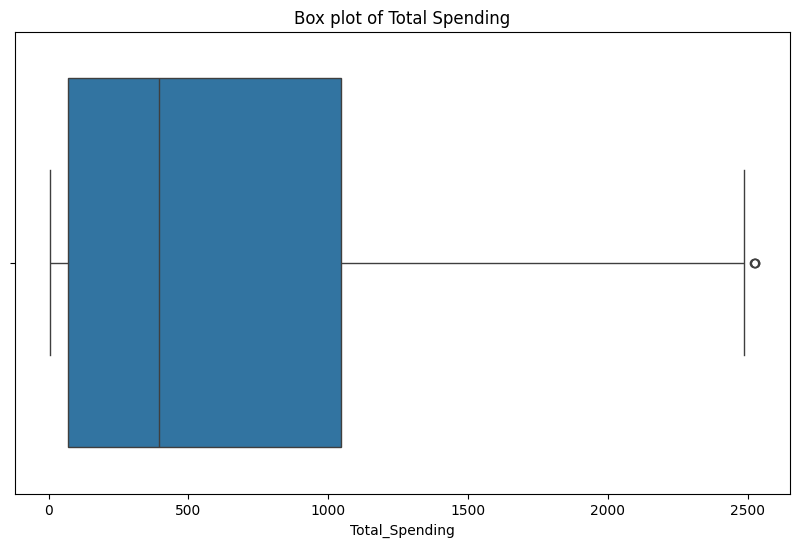

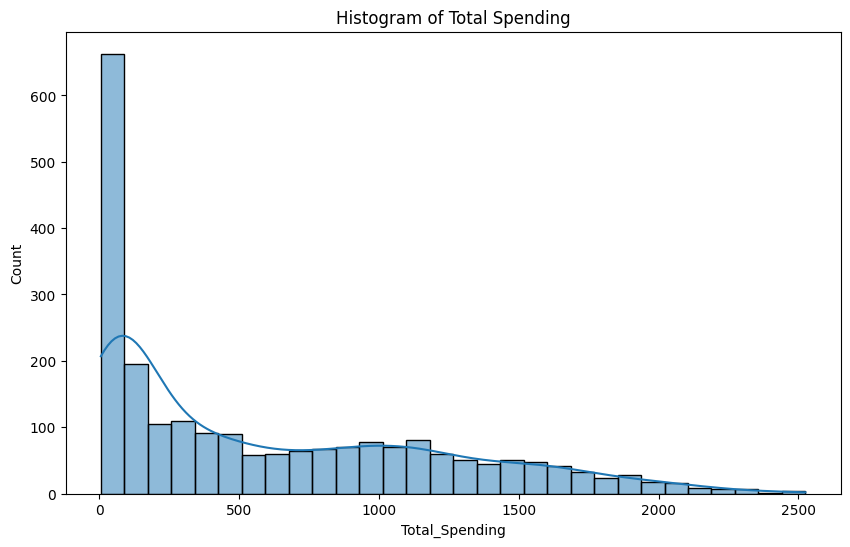

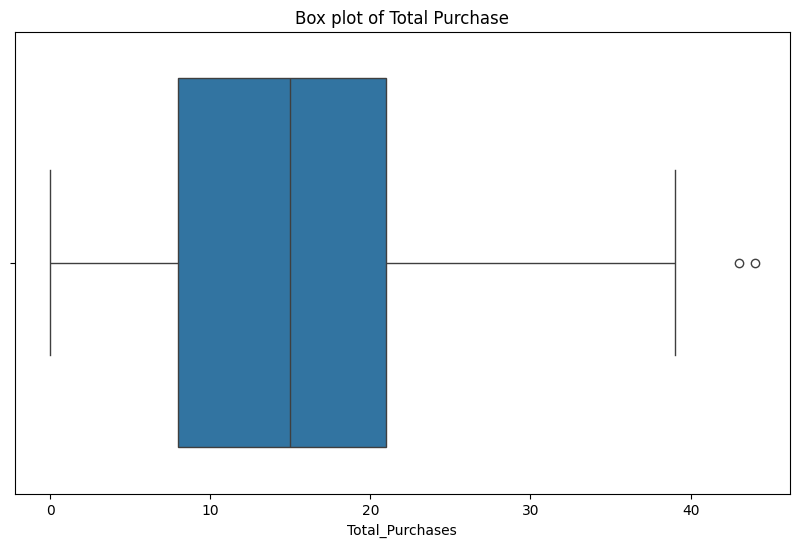

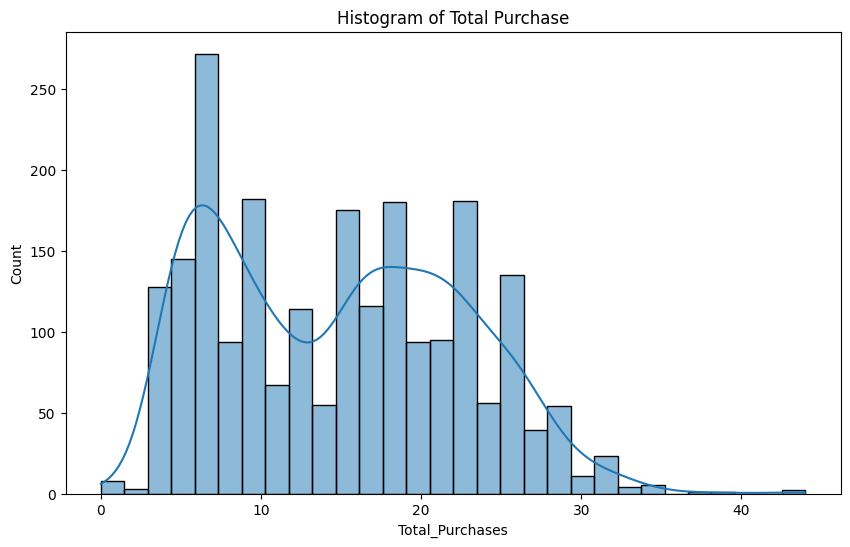

In [22]:
# Step 4: Generate box plots and histograms
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Spending', data=data)
plt.title('Box plot of Total Spending')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Total_Spending'], bins=30, kde=True)
plt.title('Histogram of Total Spending')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Purchases', data=data)
plt.title('Box plot of Total Purchase')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Total_Purchases'], bins=30, kde=True)
plt.title('Histogram of Total Purchase')
plt.show()

5. Apply ordinal and one-hot encoding based on the various types of categorical
variables.
6. Generate a heatmap to illustrate the correlation between different pairs of
variables.

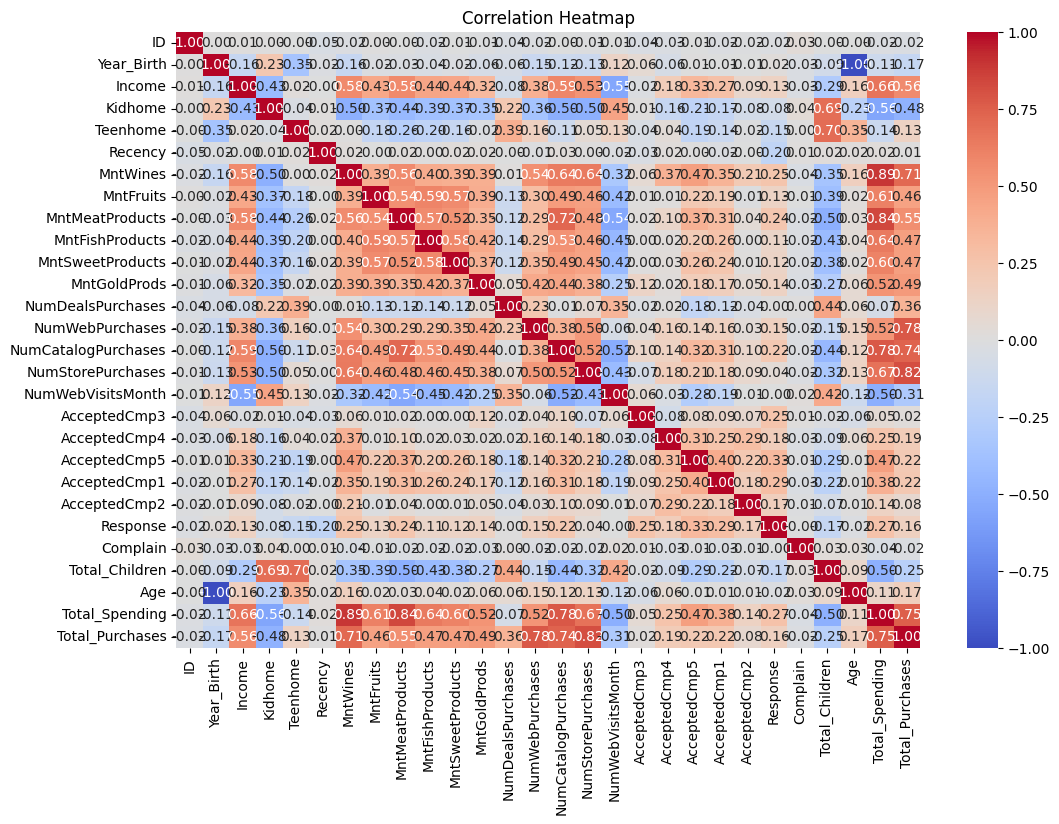

In [24]:
# Step 5: Apply ordinal and one-hot encoding
categorical_data = pd.get_dummies(data, columns=['Education', 'Marital_Status', 'Country'], drop_first=True)

# Step 6: Generate a heatmap to illustrate the correlation between different pairs of variables
# Exclude non-numeric columns
numeric_data = categorical_data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

7. Test the following hypotheses

In [26]:
# a. Older individuals may prefer in-store shopping
older_customers = data[data['Age'] > data['Age'].median()]
younger_customers = data[data['Age'] <= data['Age'].median()]
print('Older customers in-store purchases:', older_customers['NumStorePurchases'].mean())
print('Younger customers in-store purchases:', younger_customers['NumStorePurchases'].mean())

# b. Customers with children may prefer online shopping
customers_with_children = data[data['Total_Children'] > 0]
customers_without_children = data[data['Total_Children'] == 0]
print('Customers with children online purchases:', customers_with_children['NumWebPurchases'].mean())
print('Customers without children online purchases:', customers_without_children['NumWebPurchases'].mean())

# c. Cannibalization of physical store sales by other channels
print('Correlation between store purchases and other channels:\n', data[['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']].corr())

# d. US vs rest of the world in total purchase volumes
us_customers = categorical_data[categorical_data['Country_US'] == 1]
non_us_customers = categorical_data[categorical_data['Country_US'] == 0]
print('US customers total purchases:', us_customers['Total_Purchases'].mean())
print('Non-US customers total purchases:', non_us_customers['Total_Purchases'].mean())


Older customers in-store purchases: 6.238847583643123
Younger customers in-store purchases: 5.375429553264605
Customers with children online purchases: 3.9619225967540572
Customers without children online purchases: 4.393416927899686
Correlation between store purchases and other channels:
                      NumStorePurchases  NumWebPurchases  NumCatalogPurchases
NumStorePurchases             1.000000         0.502713             0.518738
NumWebPurchases               0.502713         1.000000             0.378376
NumCatalogPurchases           0.518738         0.378376             1.000000
US customers total purchases: 16.155963302752294
Non-US customers total purchases: 14.795870483341155


8.Use appropriate visualization to help analyze the following

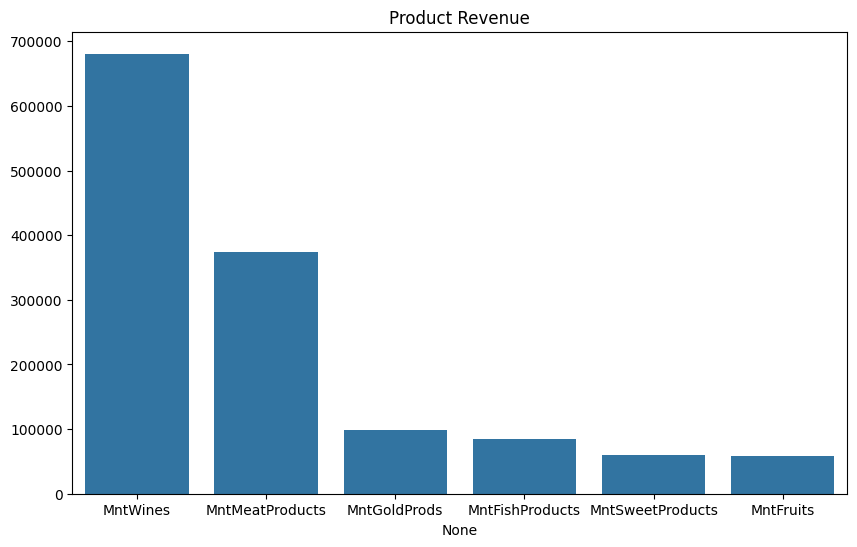

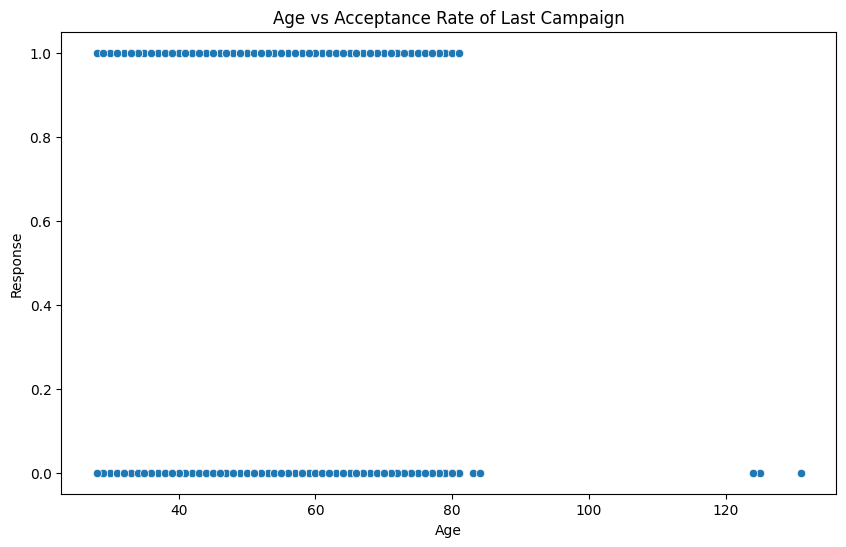

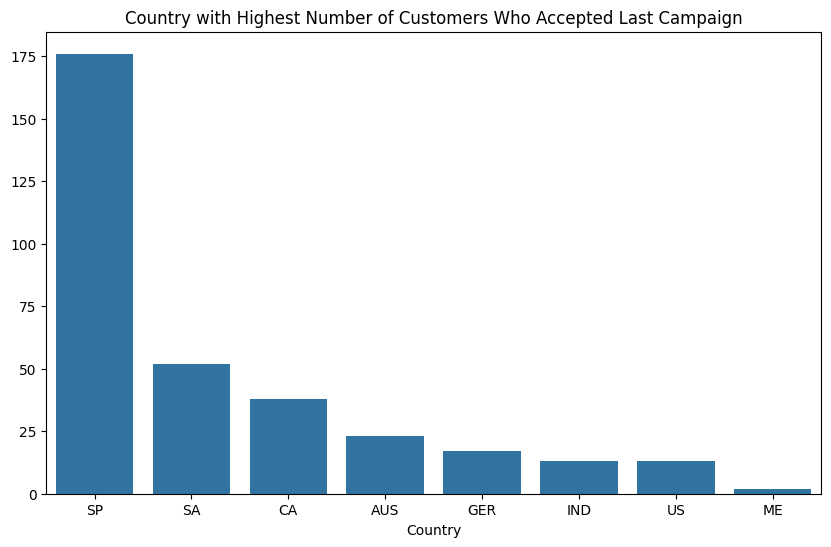

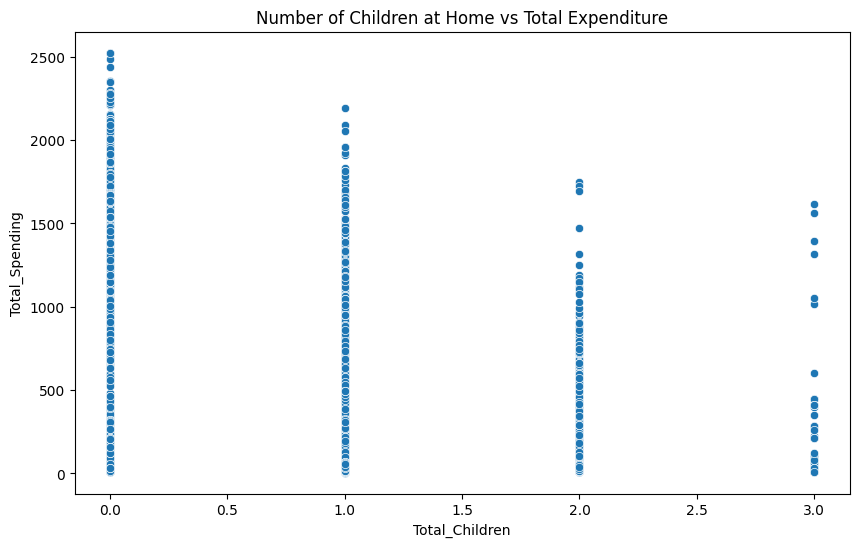

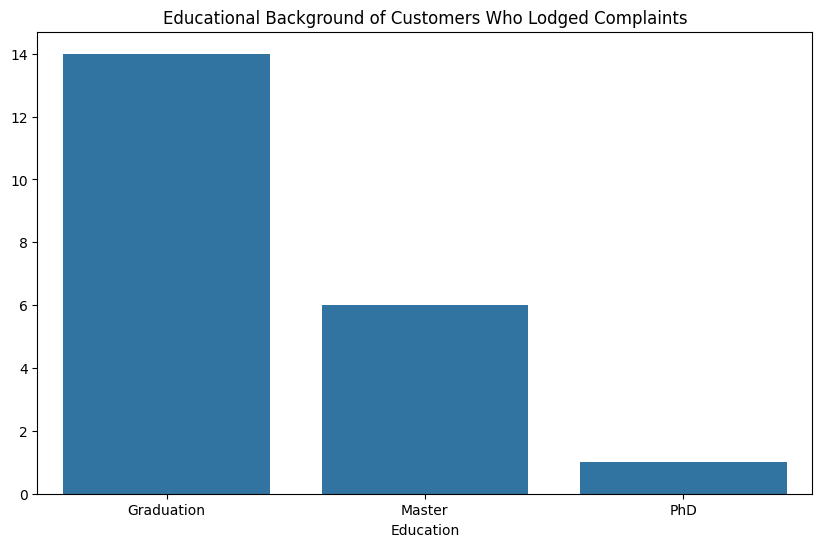

In [27]:
# Step 8: Visualization analysis
# a. Top-performing products and lowest revenue products
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_revenue = data[product_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=product_revenue.index, y=product_revenue.values)
plt.title('Product Revenue')
plt.show()

# b. Correlation between age and acceptance rate of the last campaign
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Response', data=data)
plt.title('Age vs Acceptance Rate of Last Campaign')
plt.show()

# c. Country with the highest number of customers who accepted the last campaign
accepted_campaign = data[data['Response'] == 1]

country_acceptance = accepted_campaign['Country'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=country_acceptance.index, y=country_acceptance.values)
plt.title('Country with Highest Number of Customers Who Accepted Last Campaign')
plt.show()

# d. Pattern in the number of children at home and total expenditure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Children', y='Total_Spending', data=data)
plt.title('Number of Children at Home vs Total Expenditure')
plt.show()

# e. Educational background of customers who lodged complaints in the last two years
complaints = data[data['Complain'] == 1]
education_complaints = complaints['Education'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=education_complaints.index, y=education_complaints.values)
plt.title('Educational Background of Customers Who Lodged Complaints')
plt.show()